<a href="https://colab.research.google.com/github/sarychief/BMSTU/blob/main/lab2-optimization/lab2_optimization_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch


random.seed(0)
np.random.seed(0)

Считываем данные не сразу pd.read_csv, потому что таким образом проще сплитить данные, ибо исходный df имеет склеенные фичи и предикторы.

In [13]:
data = []
with open("/content/lab1.csv", "r") as f:
  for i in f:
    row = i.split()
    data.append([float(row[0]), float(row[1])])

data = pd.DataFrame(data)

In [14]:
data.shape

(40, 2)

In [15]:
data.head()

,0,1
0,1.762616,-0.255949
1,7.954275,-59.537454
2,7.830615,-58.237982
3,6.316750,-14.521705
4,-9.282208,-32.656908


In [16]:
X = data[0]
y = data[1]

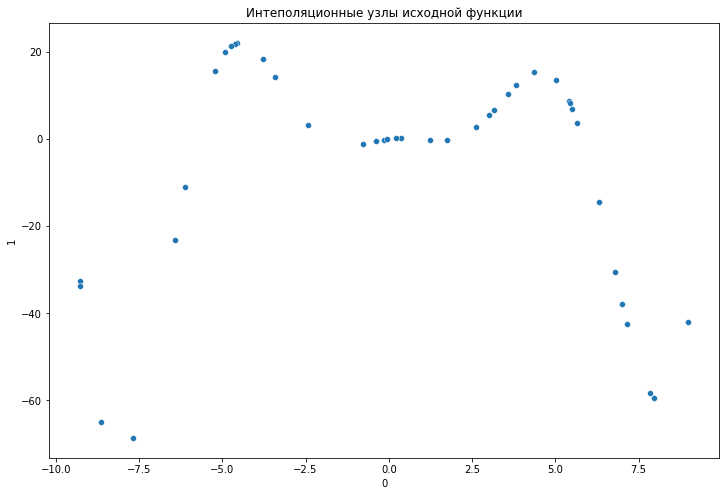

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X, y=y)
plt.title("Интеполяционные узлы исходной функции")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [19]:
def loss(pred, target):
  # MSE
  squares = (pred - target)**2
  return squares.mean()

In [25]:
import torch

x = torch.tensor(
    X_train, requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(X_train.data.numpy().copy())
    fn_history.append(function_parabola(X_train).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, X_train)

KeyError: ignored

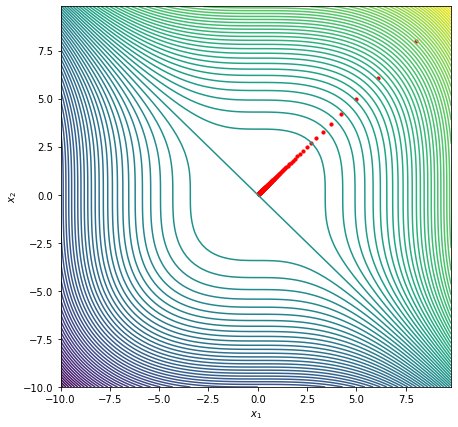

In [7]:
def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');